In [1]:
cd Desktop/ultimate_challenge

/Users/dillonquan/Desktop/ultimate_challenge


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_json('logins.json')

In [4]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df.set_index('login_time', inplace = True)
df['count'] = 1
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


## Part 1 Exploratory Data Analysis

#### The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

The login.json file contains login timestamps from a particular geographical location. The following figures show the number of logins for different time periods. The login time stamps were aggregated to count the number of logins in each 15 min interval and plotted for visualization in Figure 1. As see below, a 15 min interval plot provides too many data points to spot trends. As such, the period was extended until the trend became clear. Both Figure 3 and Figure 5 provide clear visuals of when logins are made during the hour of the day and during the day of the week. Depending on the desired period, either one can be helpful in spotting when the number of usage is high or low.

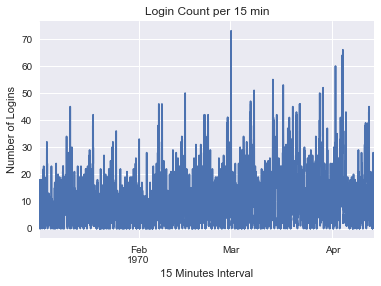

In [6]:
#plot of the login count per 15 mins
temp = df.resample('15T').count()
temp.plot(title='Login Count per 15 min', legend = False)
plt.xlabel('15 Minutes Interval')
plt.ylabel('Number of Logins')

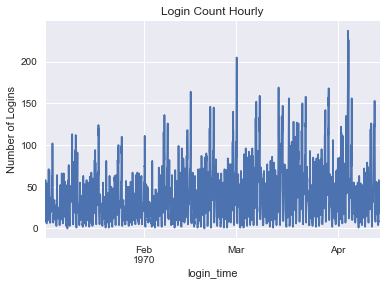

In [7]:
#plot of the login count per hour
temp = df.resample('H').count()
temp.plot(title='Login Count Hourly', legend = False)
plt.ylabel('Number of Logins')

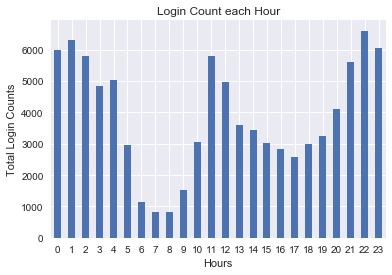

In [8]:
#plot of the total number of login at each hour
temp['hour'] = temp.index.hour
temp.groupby('hour').sum().plot(kind='bar',title='Login Count each Hour', legend = False)
plt.ylabel('Total Login Counts')
plt.xlabel('Hours')
plt.xticks(rotation = 0)
plt.show()

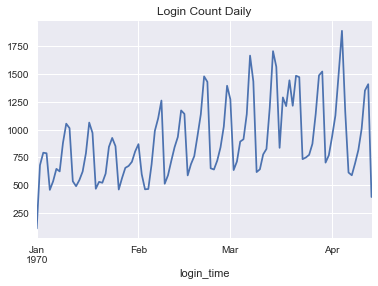

In [9]:
#plotting the login count daily
temp = df.resample('D').count()
temp.plot(title = 'Login Count Daily', legend = False)

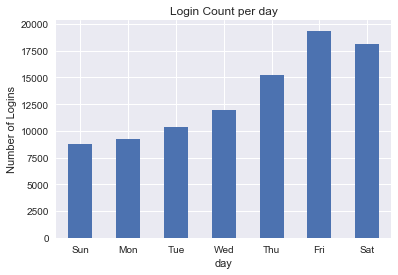

In [10]:
#plot of the total number of login count per day
temp['day'] = temp.index.dayofweek
temp.groupby('day').sum().plot(kind = 'bar',title='Login Count per day', legend =False)
plt.xticks(range(0,7),('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'), rotation = 0)
plt.ylabel('Number of Logins')

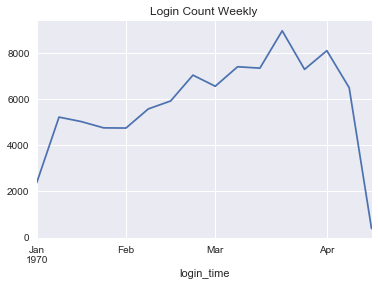

In [11]:
#plotting the login count weekly
temp = df.resample('W').count()
temp.plot(title='Login Count Weekly', legend = False)

## Part 2 Experiment and Metric Design

#### The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

#### Question 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

The metric of success for this experiment will be the revenue increase from toll since the hypothesize factor that hindered driver partners from being available in the neighboring city is the required toll to cross the bridge.

#### Question 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

##### a. how you will implement the experiment?
If I can assume that each time a driver partner crossing the bridge can be identified, I will separate the revenue generated from driver partners with the others per week or month. Then compare the toll generated from driver partners from both cities to the toll before the experiment. However, if driver partners cannot be identified, I will count toll generated during the day time from Gotham and during the night from Metropolis. Then, compare the tolls generated this way from the pre-experiment to the experiment. Since one city is more active than the other at a time, cars that are crossing the bridge to the more active city should predominantly be driver partners going to the other city for customers.

##### b. what statistical test(s) you will conduct to verify the significance of the observation?
A hypothesis testing using a two sample t-test or z-test on the difference in average toll generated from pre-experiment and during the experiment can be used to verify the significance of the experiment. If reimbursting toll to driver partners did not change the availability of drivers from the other city, then the average toll generated before the experiment and during the experiment should be 0, or $\mu_{1} - \mu_{2} = 0$. However, if reimbursting tolls increase driver partners availability in the other city, then the average toll generated from the experiment should be higher, $\mu_{1} - \mu_{2} \neq 0.$

##### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
When performing a standard hypothesis testing, if the p-value determined is less than the preset $\alpha = .05$, then it can be concluded that there is strong evidence to reject the null hypothesis and accept the alternate hypotheis. As a result, if reimbursting toll to drivers did not increase availability, then the chances of the average toll revenue generated during the experiment deviating from the average toll revenue before the experiment should be low, p-value > .05. Otherwise, a p-value less than .05 is statifically significant and can conclude that reimbursting toll to drivers did encourage drivers to be available in the neighboring city. The caveat for this test is that this is dependent on the preset alpha. A p value that is greater than .05 but still relatively close doesnt mean that there isnt any increase in driver partners from the neighbor city, just not enough to reject the null hypothesis.

## Part 3 Predictive Modeling

#### Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Data description

    ● city: city this user signed up in
    ● phone: primary device for this user
    ● signup_date: date of account registration; in the form ‘YYYY MM DD’
    ● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
    ● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    ● avg_rating_by_driver: the rider’s average rating over all of their trips
    ● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
    ● surge_pct: the percent of trips taken with surge multiplier > 1
    ● avg_surge: The average surge multiplier over all of this user’s trips
    ● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
    ● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
    ● weekday_pct: the percent of the user’s trips occurring during a weekday

### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

From the given data, it was determined that only 37% of users who signed up in January still use the service. Of all the 37% that are retained, majority of them signed up from Winterfell followed by King's Landing and Astapor. 50% of the users that are retained were ultimate black users. Also, about 90% of the users that are retained uses an iPhone.

In [12]:
import json
with open('ultimate_data_challenge.json') as file:
    data = json.load(file)

In [13]:
df = pd.DataFrame(data)

Data description

    ● city: city this user signed up in
    ● phone: primary device for this user
    ● signup_date: date of account registration; in the form ‘YYYY MM DD’
    ● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
    ● avg_dist: the average distance in miles per trip taken in the first 30 days after signup
    ● avg_rating_by_driver: the rider’s average rating over all of their trips
    ● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
    ● surge_pct: the percent of trips taken with surge multiplier > 1
    ● avg_surge: The average surge multiplier over all of this user’s trips
    ● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
    ● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
    ● weekday_pct: the percent of the user’s trips occurring during a weekday

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
#setting last_trip_date and signup_date to be of datetime type
df['signup_date'] = pd.to_datetime(df['signup_date']) 
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [16]:
#extracting the month of last_trip_date from each user
df['temp'] = df['last_trip_date']
df.set_index('temp', inplace = True)
df['month'] = df.index.month 
df.reset_index(inplace=True)
df.drop('temp', inplace=True, axis = 1)

In [17]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,month
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,6
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,5
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,6
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,3


In [18]:
#Retention Rate from January user
print('The total retention rate is {:.1f}%'.format((df[df.month >=6].shape[0]/len(df))*100) + ' from users who signed up in January.')

The total retention rate is 37.6% from users who signed up in January.


In [19]:
#There are only 3 cities of users
df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

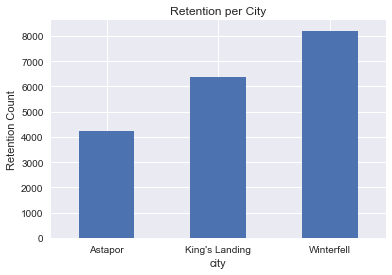

In [20]:
#The number of users that were retained grouped by cities
df[df.month >= 6].groupby('city')['month'].count().plot(kind = 'bar', title = 'Retention per City')
plt.xticks(rotation = 0)
plt.ylabel('Retention Count')
plt.show()

In [21]:
#number of black users and non black users
print('There are a total of ' + str(df[df['ultimate_black_user'] == True].shape[0]) + ' Ultimate Black users.')

There are a total of 18854 Ultimate Black users.


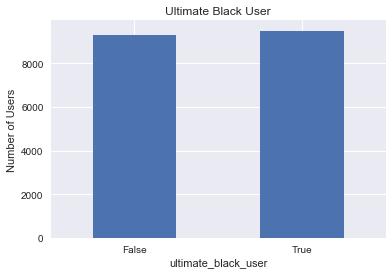

In [22]:
df[df.month >=6].groupby('ultimate_black_user')['ultimate_black_user'].count().plot(kind='bar', title ='Ultimate Black User')
plt.xticks(rotation = 0)
plt.ylabel('Number of Users')
plt.show()

In [23]:
#the percentage of black users that were retained
df[(df.month >= 6) &(df['ultimate_black_user'] == True)].shape[0]/df[df['ultimate_black_user'] == True].shape[0]

0.5037127400021215

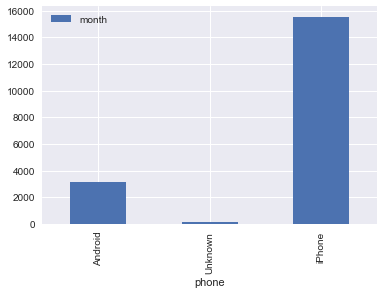

In [24]:
#most of the users that are retained are iPhone users.
df[df.month >= 6][['month', 'phone']].fillna('Unknown').groupby('phone').count().plot(kind = 'bar')

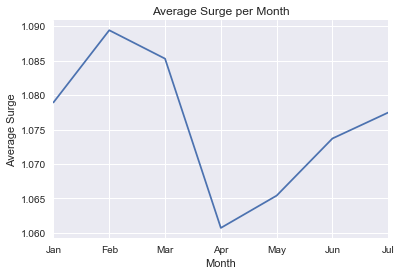

In [25]:
#average surge for all users 
df.groupby('month')['avg_surge'].mean().plot(title='Average Surge per Month')
plt.ylabel('Average Surge')
plt.xlabel('Month')
plt.xticks(range(1,8), ('Jan', 'Feb', 'Mar', 'Apr','May', 'Jun','Jul'), rotation = 0)
plt.show()

In [26]:
temp = df[['last_trip_date', 'avg_rating_by_driver', 'avg_rating_of_driver']]
temp.set_index('last_trip_date', inplace=True)

In [27]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2014-06-17 to 2014-04-20
Data columns (total 2 columns):
avg_rating_by_driver    49799 non-null float64
avg_rating_of_driver    41878 non-null float64
dtypes: float64(2)
memory usage: 1.1 MB


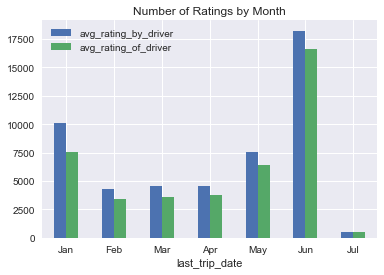

In [28]:
#plot of the number of ratings in each month in all three cities
temp.resample('M').count().plot(kind='bar', title='Number of Ratings by Month')
plt.xticks(range(0,7), ('Jan', 'Feb', 'Mar', 'Apr','May', 'Jun','Jul'), rotation = 0)
plt.show()

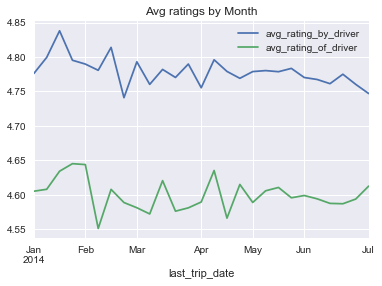

In [29]:
#weekly average ratings by both parties in all three cities
temp.resample('W').mean().plot(title='Avg ratings by Month')
plt.show()

### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

To determine whether a user is retained comes down to a classification problem. A Logistic regression algorithm was used since the probability of the users of being retained was desired. Using the AUC score to evaluate the model, an auc score of 50% is no better than randomly guessing. This model produces an AUC score of 76% which beats a random guess by a good margin.

In [30]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,month
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,6
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,5
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,6
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,3


In [38]:
#creating target column
df['retain'] = (df.month >= 6)

In [43]:
#impute missing values
df['avg_rating_of_driver'].fillna(method = 'ffill',inplace = True)
df['avg_rating_by_driver'].fillna(method = 'ffill', inplace = True)
df.phone.fillna('Unknown', inplace = True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
month                     50000 non-null int64
retain                    50000 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.7+ MB


In [54]:
#changing the boolean type series to numeric and droppping the month column
df['ultimate_black_user'] = df['ultimate_black_user'].astype('int')
df['retain'] = df['retain'].astype('int')
df.drop('month', inplace = True, axis = 1)
df = pd.get_dummies(df, drop_first = True)

In [60]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retain,city_King's Landing,city_Winterfell,phone_Unknown,phone_iPhone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,1,46.2,1,1,0,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,0,50.0,0,0,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,0,100.0,0,0,0,0,1
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,1,80.0,1,1,0,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,0,82.4,0,0,1,0,0


In [56]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [64]:
X = df.drop(['retain','last_trip_date','signup_date'], axis = 1)
y = df.retain
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = .3)

C: 0.1 penalty: l2


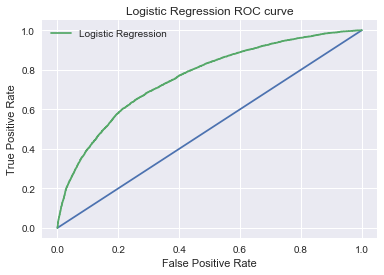

[[7958 1421]
 [2817 2804]]
             precision    recall  f1-score   support

          0       0.74      0.85      0.79      9379
          1       0.66      0.50      0.57      5621

avg / total       0.71      0.72      0.71     15000



In [65]:
#setup the gridsearchcv to help find the best hyperparameters to train the model
c_space = np.logspace(-5,6,12)
params = {'C':c_space, 'penalty':['l1','l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, params, cv = 5)
logreg_cv.fit(X_train, y_train)

#train model using the best parameters determine from GridSearchCV
logreg = LogisticRegression(C = logreg_cv.best_params_['C'], penalty = logreg_cv.best_params_['penalty'])
logreg.fit(X_train, y_train)
y_prob = logreg.predict_proba(X_test)[:,1]
y_pred = logreg.predict(X_test)

print("C: {}".format(logreg_cv.best_params_['C']), "penalty: {}" .format(logreg_cv.best_params_['penalty']))

#Plotting the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0,1], [0,1])
plt.plot(fpr, tpr, label ='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend()
plt.show()

#printing the classification report to see how well the model did
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [70]:
#printing the training and testing AUC Score and accuracy to see if the model overfitted
from sklearn.metrics import roc_auc_score
print('Training AUC Score: {}'.format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])))
print('Testing AUC Score: {}'.format(roc_auc_score(y_test, y_prob)))
print('Training Accuracy: {}'.format(logreg.score(X_train, y_train)))
print('Testing Accuracy: {}'.format(logreg.score(X_test, y_test)))

Training AUC Score: 0.7608904002427063
Testing AUC Score: 0.7606286335916945
Training Accuracy: 0.7197428571428571
Testing Accuracy: 0.7174666666666667


### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

From EDA, users that were retained were in the following order: Winterfell, King's Landing, Astapor. In addition, 90% of the users retained were iPhone users. Of all the users that were retained, only 50% of them were Ultimate Black Users. As a result, to improve longterm rider retention, the following can be done: improve the app for android users, improve the ultimate black users for new users, and promote more users in Astapor.
